In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
a = ['29_marzo',
 '14_abril',
 '28_abril',
 '7_mayo',
 '12_mayo',
 '19_mayo',
 '26_mayo',
 '2_junio',
 '11_junio',
 '16_junio',
 '23_junio',
 '2_julio',
 '9_julio',
 '14_julio',
 '23_julio',
 '5_agosto',
 '13_agosto',
 '19_agosto',
 '15_setiembre',
 '24_setiembre',
 '15_octubre',
 '29_octubre',
 '12_noviembre',
 '26_noviembre']
flies_dict = {j:i for i, j in enumerate(a)}

In [3]:
def to_df(data, key = 'Senterahomogeneity'):
    data = data[0]
    sa = []
    fly = []
    landmark = []
    for i in data:
        aux = i[key]
        sa.append(aux.flatten())
        fly.append(flies_dict[(i['Date'])[:-2]])
        landmark.append(i['landmarks'][0])
    sa = np.array(sa)
    print(sa.shape)
    fly = np.array(fly)
    landmark = np.array(landmark)
    out = {'15_0':sa[:,0], '15_90':sa[:,1], '30_0':sa[:,2], '30_90':sa[:,3], '50_0':sa[:,4], '50_90':sa[:,5], 'fly':fly, 'landmark':landmark}
    return pd.DataFrame(out)

In [4]:
out = []
with open('senterargbhomogeneity.pkl', 'rb') as handle:
    try:
        while True:
            out.append(pickle.load(handle))
    except EOFError:
        pass

In [5]:
out[0][0]['Senterahomogeneity'].flatten()

array([0.14467048, 0.14479833, 0.11679374, 0.11531847, 0.10653145,
       0.10542809])

In [6]:
data = to_df(out)

(4133, 6)


In [9]:
data

,15_0,15_90,30_0,30_90,50_0,50_90,fly,landmark
0,0.144670,0.144798,0.116794,0.115318,0.106531,0.105428,8,N_Control
1,0.151051,0.152582,0.122054,0.121578,0.112162,0.110044,8,P_Control
2,0.147733,0.151046,0.115586,0.115848,0.105117,0.105493,8,K_Control
3,0.131963,0.140764,0.112058,0.111860,0.103291,0.103053,8,Control
4,0.158860,0.162291,0.127165,0.126652,0.118328,0.113454,8,H50%
...,...,...,...,...,...,...,...,...
4128,0.116537,0.120360,0.100817,0.102188,0.092546,0.095513,12,K_Control
4129,0.102952,0.105841,0.086658,0.089652,0.079483,0.083362,12,Control
4130,0.114995,0.113984,0.097978,0.097928,0.092691,0.092209,12,H50%
4131,0.107977,0.111161,0.092265,0.093713,0.085414,0.087113,12,H75%


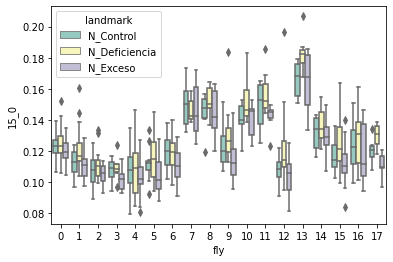

In [17]:
tips = data[(data['landmark']=='N_Exceso') | (data['landmark']=='N_Control') | (data['landmark']=='N_Deficiencia')]
tips
ax = sns.boxplot(x="fly", y="15_0", hue="landmark",
                 data=tips, palette="Set3")

## NITROGENO TOTAL

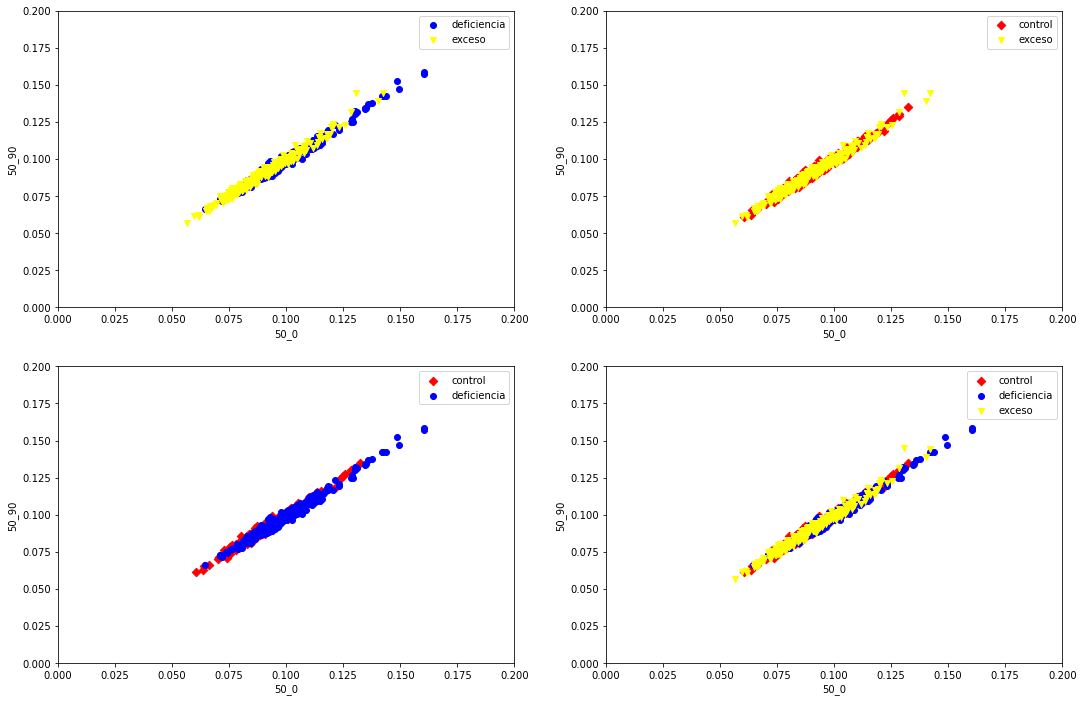

In [45]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(data['50_0'][data.landmark == 'N_Control'],data['50_90'][data.landmark == 'N_Control'],marker='D',color='red',label='Very Low')
plt.scatter(data['50_0'][data.landmark == 'N_Deficiencia'],data['50_90'][data.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'N_Exceso'], data['50_90'][data.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,2)
plt.scatter(data['50_0'][data.landmark == 'N_Control'],data['50_90'][data.landmark == 'N_Control'],marker='D',color='red',label='control')
#plt.scatter(data['50_0'][data.landmark == 'N_Deficiencia'],data['15_90'][data.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'N_Exceso'], data['50_90'][data.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,3)
plt.scatter(data['50_0'][data.landmark == 'N_Control'],data['50_90'][data.landmark == 'N_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'N_Deficiencia'],data['50_90'][data.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(data['50_0'][data.landmark == 'N_Exceso'], data['50_90'][data.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,4)
plt.scatter(data['50_0'][data.landmark == 'N_Control'],data['50_90'][data.landmark == 'N_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'N_Deficiencia'],data['50_90'][data.landmark == 'N_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'N_Exceso'], data['50_90'][data.landmark == 'N_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.show()

## NITROGENO FECHA

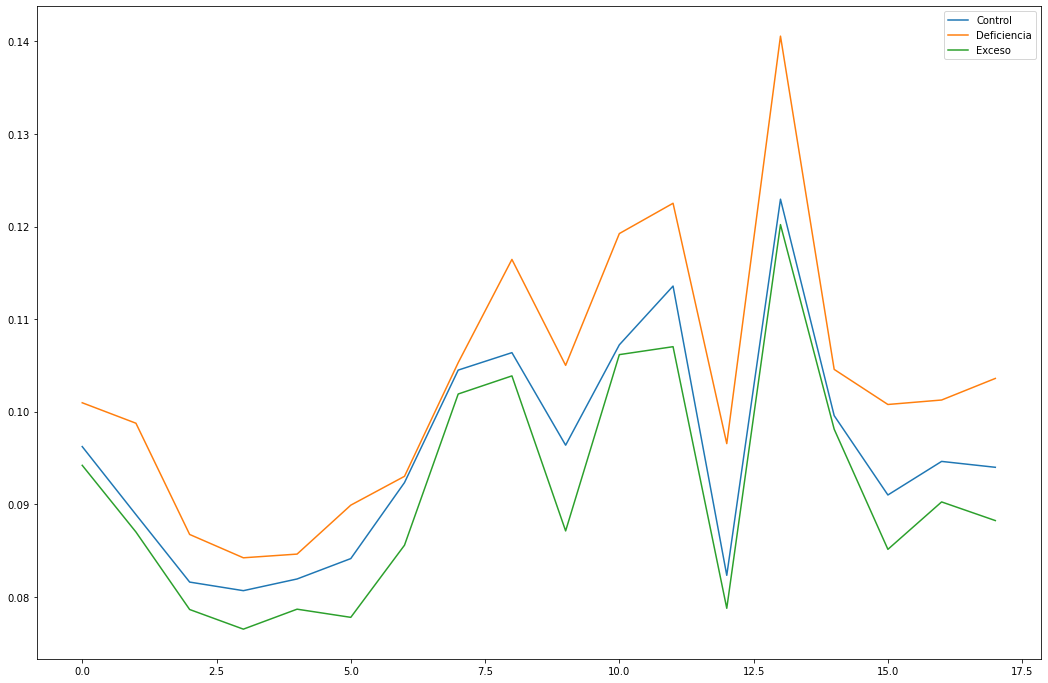

In [46]:
moutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Control')]['50_0']).values) for i in list(data['fly'].unique())}
soutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Control')]['50_90']).values) for i in list(data['fly'].unique())}
moute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Exceso')]['50_0']).values) for i in list(data['fly'].unique())}
soute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Exceso')]['50_90']).values) for i in list(data['fly'].unique())}
moutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Deficiencia')]['50_0']).values) for i in list(data['fly'].unique())}
soutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='N_Deficiencia')]['50_90']).values) for i in list(data['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(data['fly'].unique())), moutc.values(),sorted(list(data['fly'].unique())), moutd.values(),sorted(list(data['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

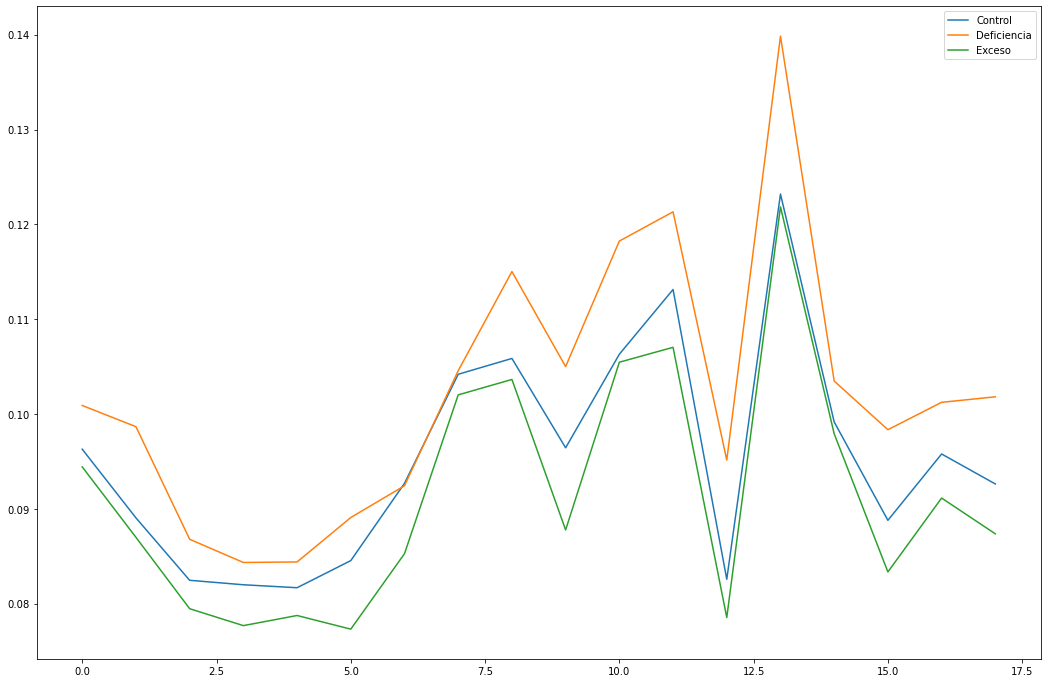

In [47]:
plt.plot(sorted(list(data['fly'].unique())), soutc.values(),sorted(list(data['fly'].unique())), soutd.values(),sorted(list(data['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

## FOSFORO TOTAL

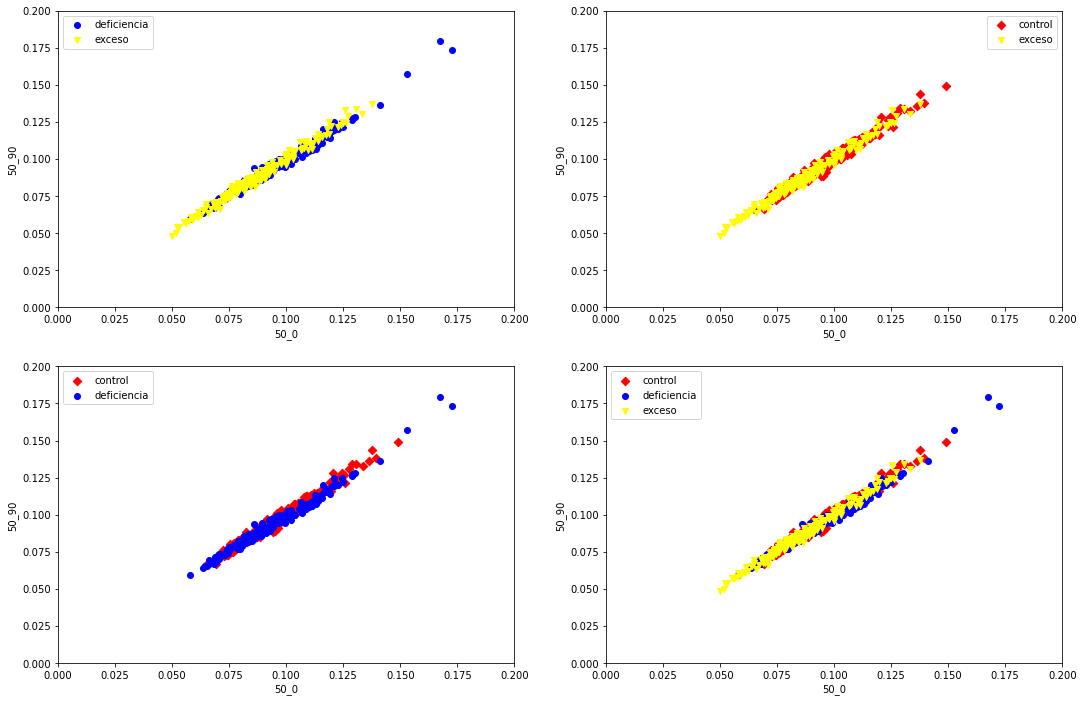

In [48]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(data['50_0'][data.landmark == 'P_Control'],data['50_90'][data.landmark == 'P_Control'],marker='D',color='red',label='Very Low')
plt.scatter(data['50_0'][data.landmark == 'P_Deficiencia'],data['50_90'][data.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'P_Exceso'], data['50_90'][data.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,2)
plt.scatter(data['50_0'][data.landmark == 'P_Control'],data['50_90'][data.landmark == 'P_Control'],marker='D',color='red',label='control')
#plt.scatter(data['50_0'][data.landmark == 'P_Deficiencia'],data['50_90'][data.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'P_Exceso'], data['50_90'][data.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,3)
plt.scatter(data['50_0'][data.landmark == 'P_Control'],data['50_90'][data.landmark == 'P_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'P_Deficiencia'],data['50_90'][data.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(data['50_0'][data.landmark == 'P_Exceso'], data['50_90'][data.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,4)
plt.scatter(data['50_0'][data.landmark == 'P_Control'],data['50_90'][data.landmark == 'P_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'P_Deficiencia'],data['50_90'][data.landmark == 'P_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'P_Exceso'], data['50_90'][data.landmark == 'P_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.show()

## FOSFORO FECHA

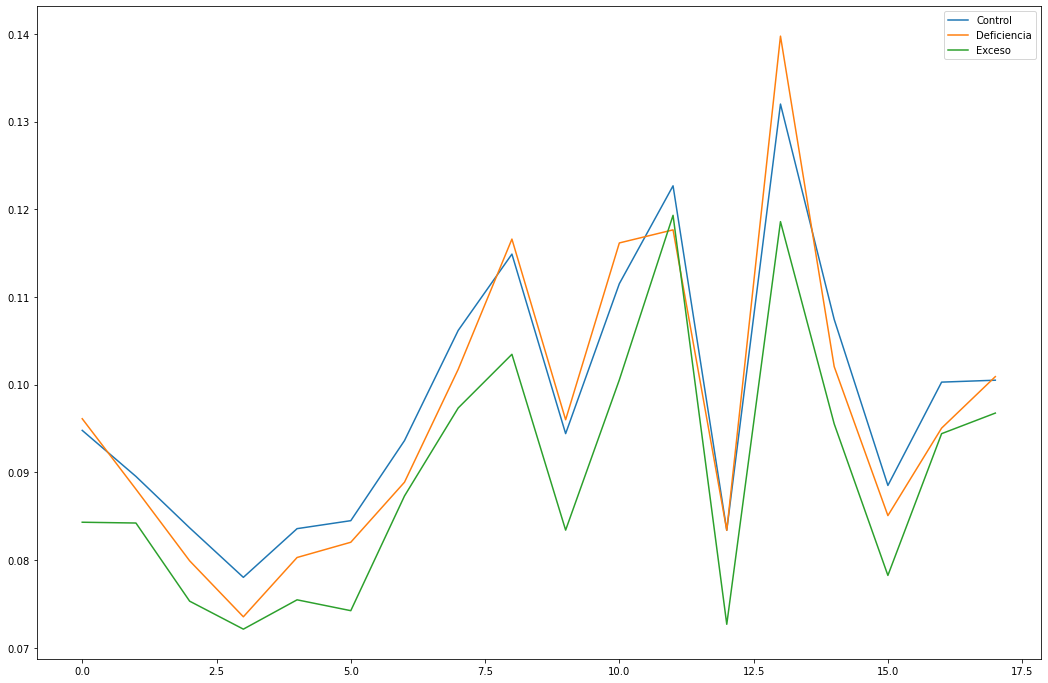

In [49]:
moutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Control')]['50_0']).values) for i in list(data['fly'].unique())}
soutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Control')]['50_90']).values) for i in list(data['fly'].unique())}
moute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Exceso')]['50_0']).values) for i in list(data['fly'].unique())}
soute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Exceso')]['50_90']).values) for i in list(data['fly'].unique())}
moutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Deficiencia')]['50_0']).values) for i in list(data['fly'].unique())}
soutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='P_Deficiencia')]['50_90']).values) for i in list(data['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(data['fly'].unique())), moutc.values(),sorted(list(data['fly'].unique())), moutd.values(),sorted(list(data['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

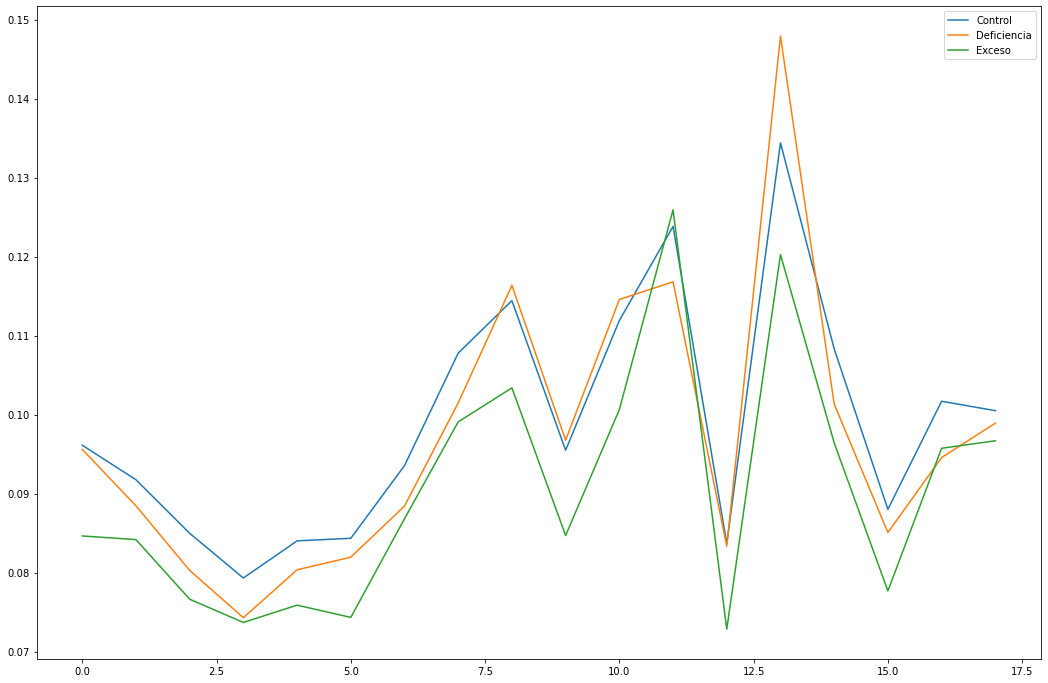

In [50]:
plt.plot(sorted(list(data['fly'].unique())), soutc.values(),sorted(list(data['fly'].unique())), soutd.values(),sorted(list(data['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

## POTASIO TOTAL

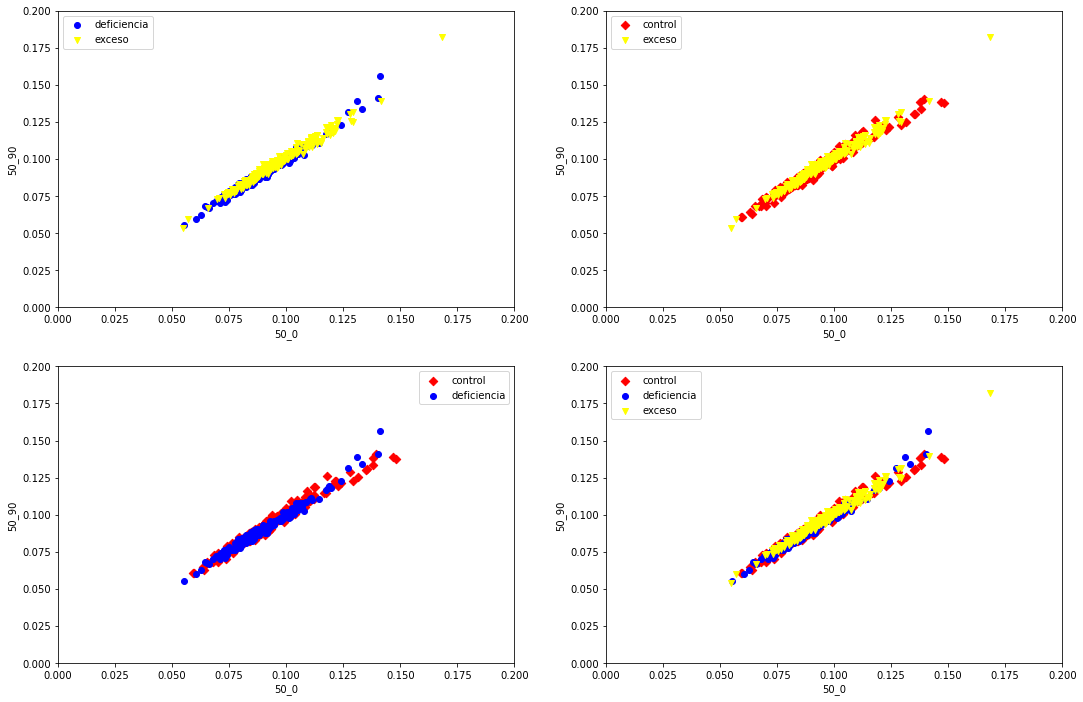

In [51]:
plt.rcParams["figure.figsize"] = (18,12)
plt.subplot(2,2,1)
#plt.scatter(data['50_0'][data.landmark == 'K_Control'],data['50_90'][data.landmark == 'K_Control'],marker='D',color='red',label='Very Low')
plt.scatter(data['50_0'][data.landmark == 'K_Deficiencia'],data['50_90'][data.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'K_Exceso'], data['50_90'][data.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,2)
plt.scatter(data['50_0'][data.landmark == 'K_Control'],data['50_90'][data.landmark == 'K_Control'],marker='D',color='red',label='control')
#plt.scatter(data['50_0'][data.landmark == 'K_Deficiencia'],data['50_90'][data.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'K_Exceso'], data['50_90'][data.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,3)
plt.scatter(data['50_0'][data.landmark == 'K_Control'],data['50_90'][data.landmark == 'K_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'K_Deficiencia'],data['50_90'][data.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
#plt.scatter(data['50_0'][data.landmark == 'K_Exceso'], data['50_90'][data.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.subplot(2,2,4)
plt.scatter(data['50_0'][data.landmark == 'K_Control'],data['50_90'][data.landmark == 'K_Control'],marker='D',color='red',label='control')
plt.scatter(data['50_0'][data.landmark == 'K_Deficiencia'],data['50_90'][data.landmark == 'K_Deficiencia'], marker='o',color='blue',label='deficiencia')
plt.scatter(data['50_0'][data.landmark == 'K_Exceso'], data['50_90'][data.landmark == 'K_Exceso'],marker='v',color='yellow',label='exceso')
plt.xlabel('50_0')
plt.ylabel('50_90')
plt.legend()
plt.axis((0, 0.2, 0., 0.2))
plt.show()

## POTASIO FECHA

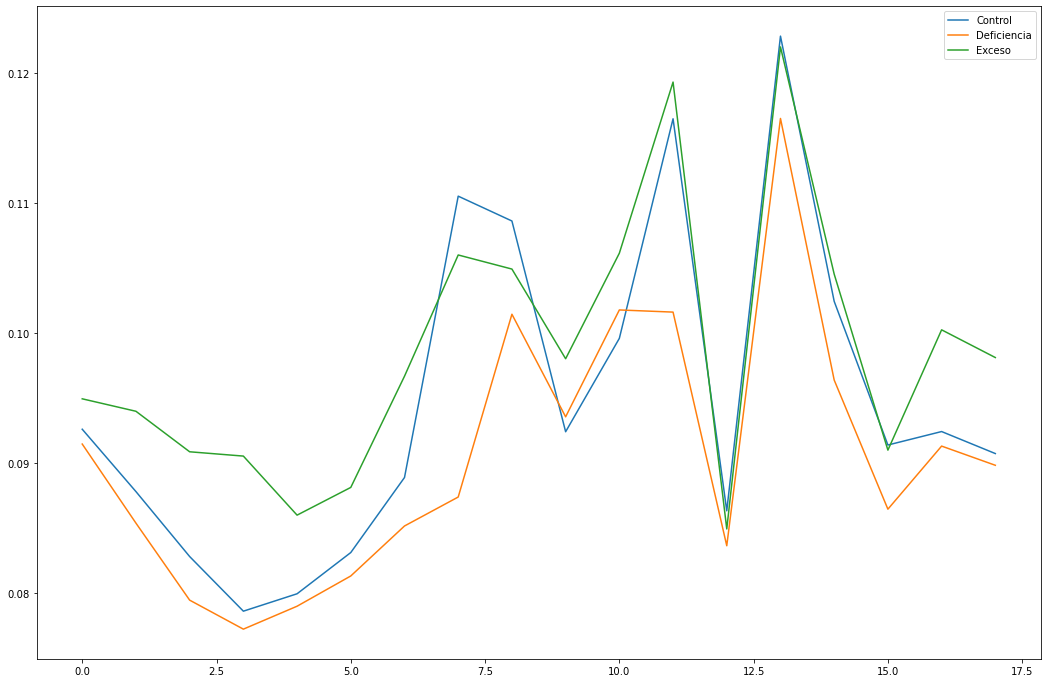

In [52]:
moutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Control')]['50_0']).values) for i in list(data['fly'].unique())}
soutc = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Control')]['50_90']).values) for i in list(data['fly'].unique())}
moute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Exceso')]['50_0']).values) for i in list(data['fly'].unique())}
soute = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Exceso')]['50_90']).values) for i in list(data['fly'].unique())}
moutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Deficiencia')]['50_0']).values) for i in list(data['fly'].unique())}
soutd = {i:np.mean((data[(data['fly']==i) & (data['landmark']=='K_Deficiencia')]['50_90']).values) for i in list(data['fly'].unique())}
moutc = dict(sorted(moutc.items()))
soutc = dict(sorted(soutc.items()))
moute = dict(sorted(moute.items()))
soute = dict(sorted(soute.items()))
moutd = dict(sorted(moutd.items()))
soutd = dict(sorted(soutd.items()))
plt.plot(sorted(list(data['fly'].unique())), moutc.values(),sorted(list(data['fly'].unique())), moutd.values(),sorted(list(data['fly'].unique())), moute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])

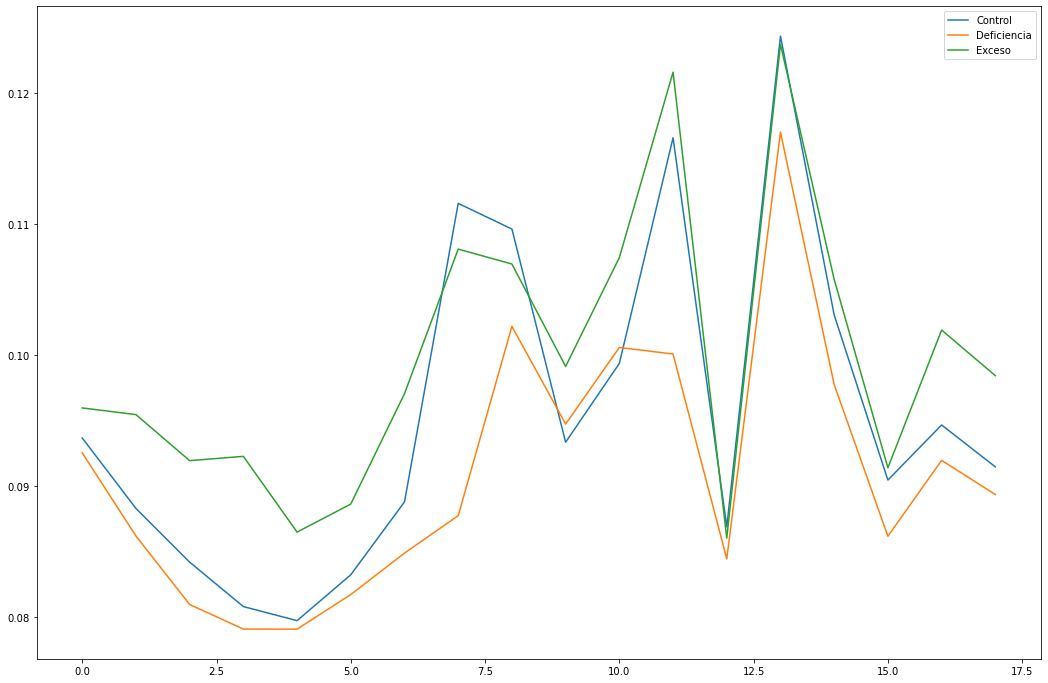

In [53]:
plt.plot(sorted(list(data['fly'].unique())), soutc.values(),sorted(list(data['fly'].unique())), soutd.values(),sorted(list(data['fly'].unique())), soute.values())
plt.legend(['Control', 'Deficiencia','Exceso'])